# Import Modules

In [39]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [40]:
paths = []
labels = []

for dirname, _, filenames in os.walk(r'C:\Users\Shreya Jadhav\Documents\CodeClause Internship Projects\Speech emotion recognition\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print("Dataset is Loaded...")

Dataset is Loaded...


In [41]:
# Create a DataFrame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\Shreya Jadhav\Documents\CodeClause In...,angry
1,C:\Users\Shreya Jadhav\Documents\CodeClause In...,angry
2,C:\Users\Shreya Jadhav\Documents\CodeClause In...,angry
3,C:\Users\Shreya Jadhav\Documents\CodeClause In...,angry
4,C:\Users\Shreya Jadhav\Documents\CodeClause In...,angry


In [42]:
df['label'].value_counts()

label
angry      800
disgust    800
happy      800
neutral    800
sad        734
fear       600
ps         600
Name: count, dtype: int64

# Exploratory Data Analysis

In [43]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis = 'time',y_axis = 'hz')
    plt.colorbar()

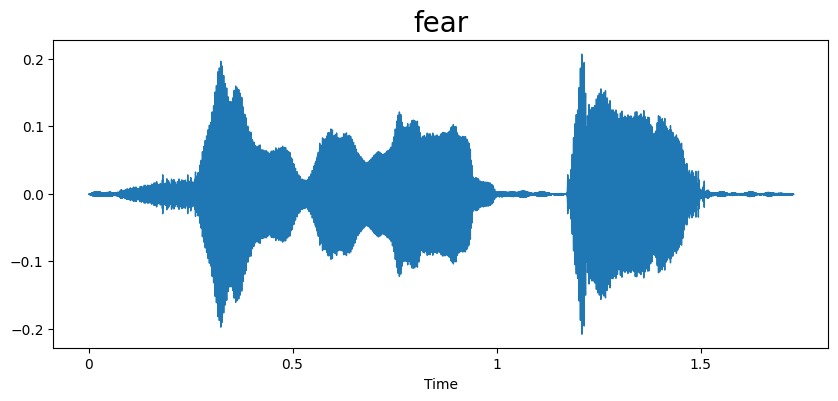

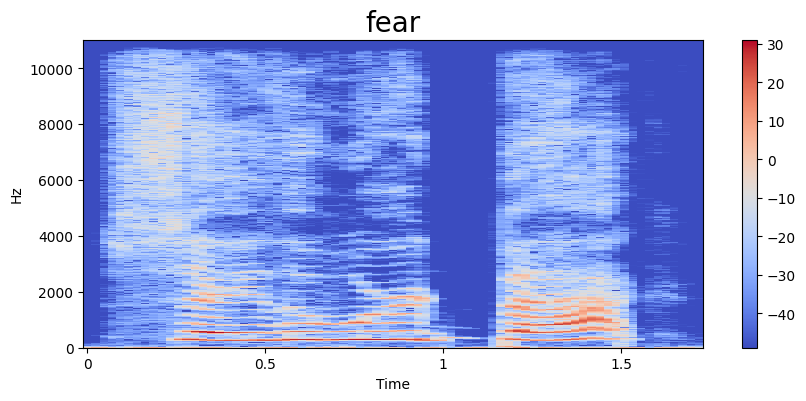

In [44]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

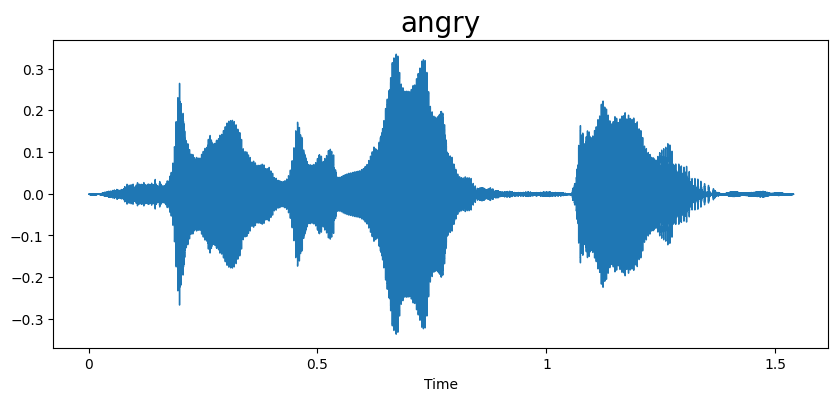

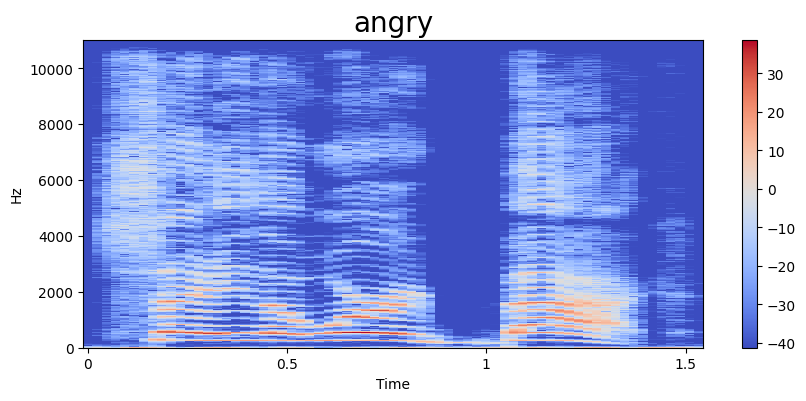

In [45]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

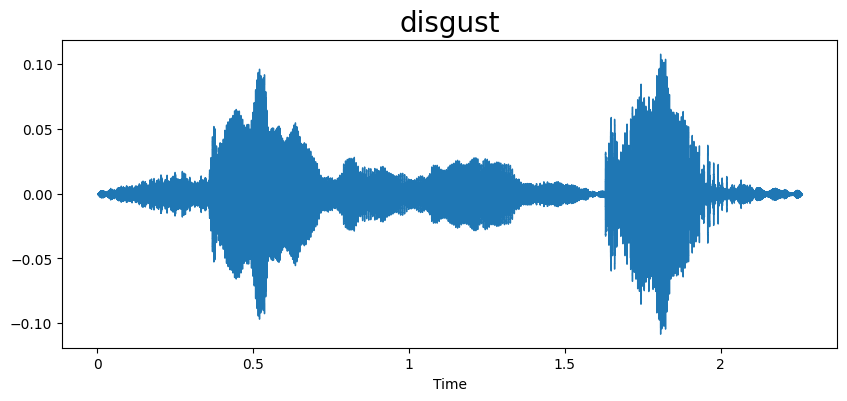

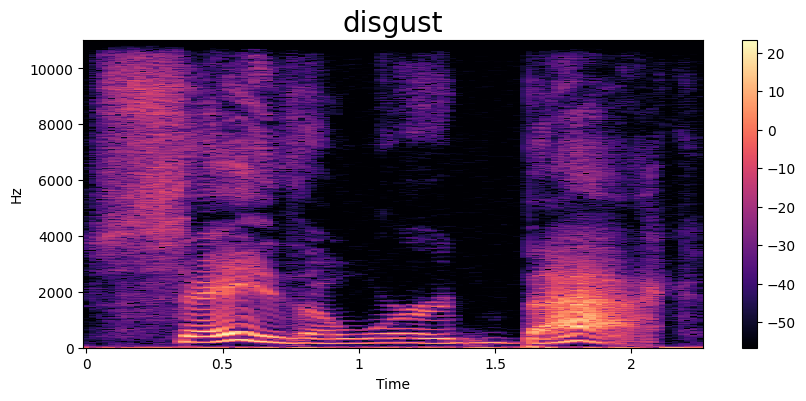

In [46]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

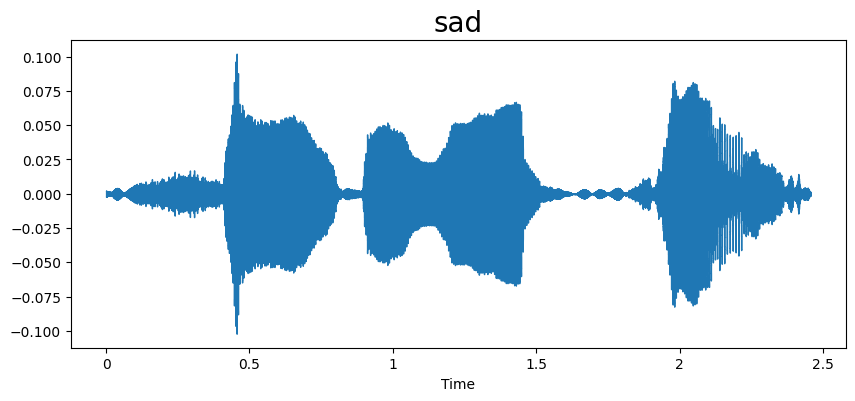

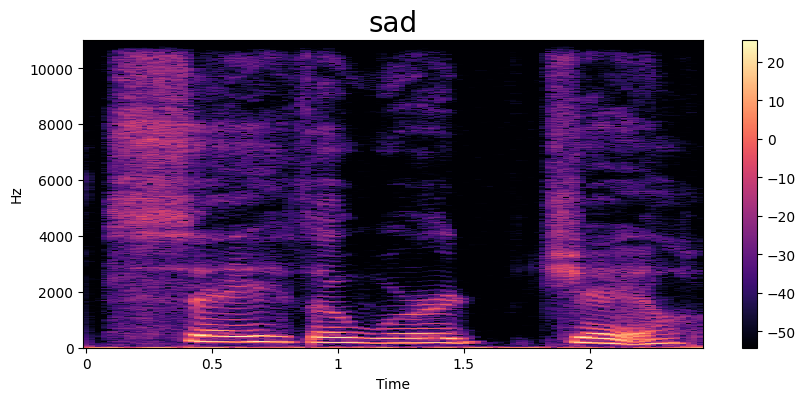

In [47]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

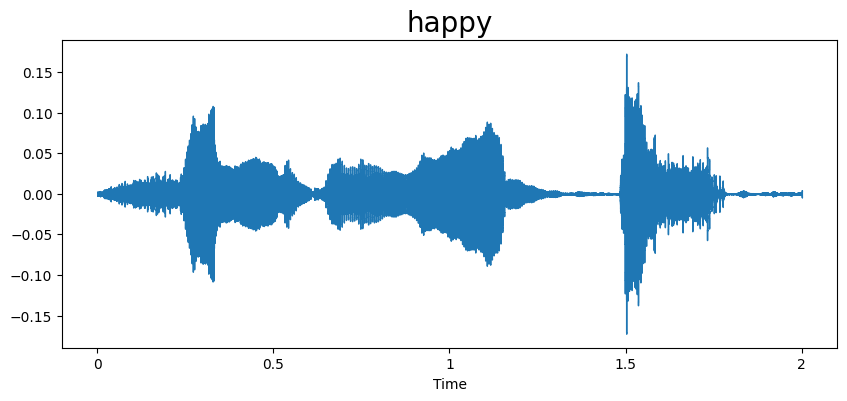

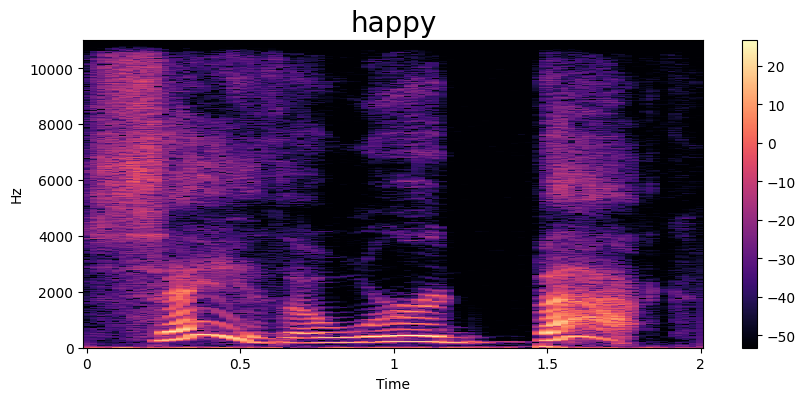

In [48]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

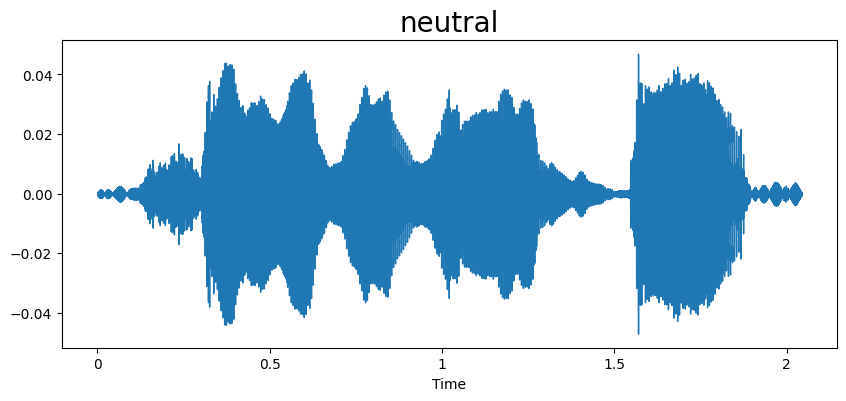

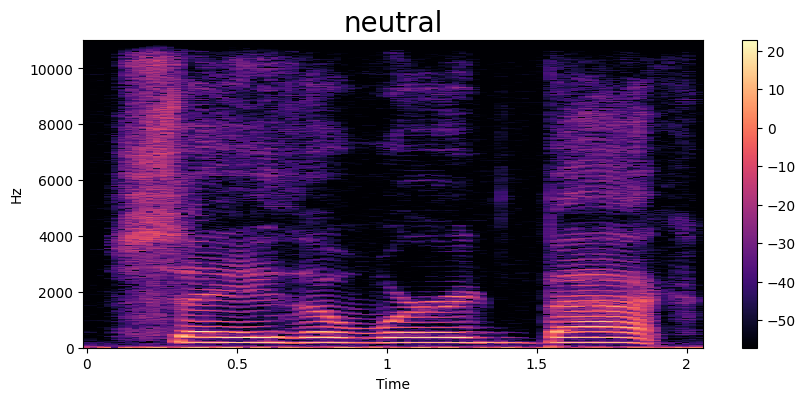

In [49]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

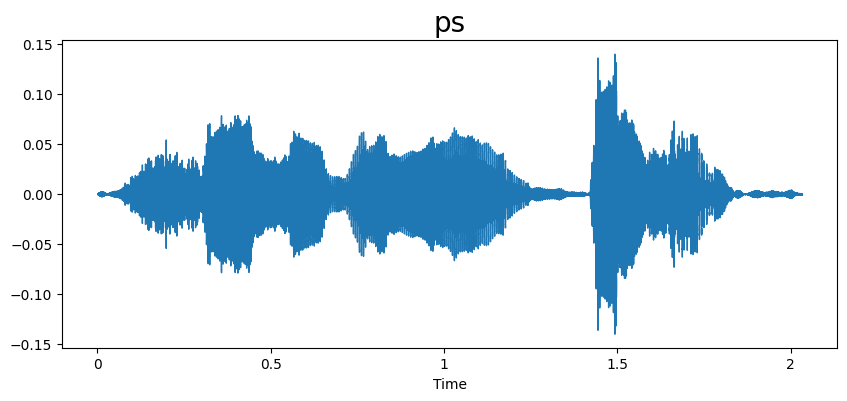

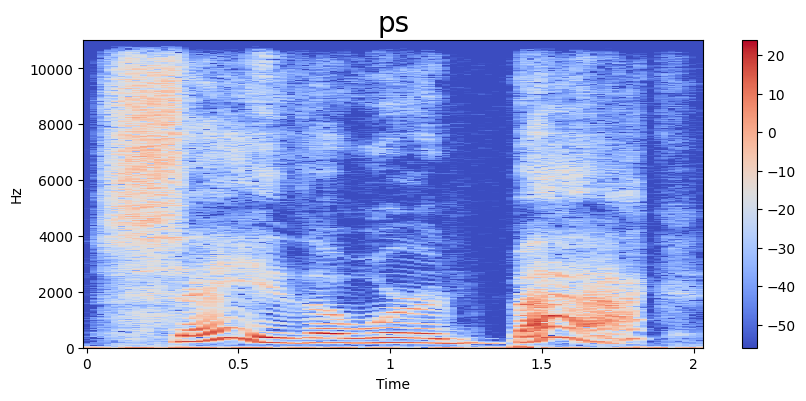

In [50]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [51]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [52]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [53]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [54]:
x_mfcc 

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
5129    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5130    [-426.90918, 102.54757, 24.800041, 43.04809, 4...
5131    [-378.50494, 80.91062, 35.30053, 39.74792, -4....
5132    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5133    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5134, dtype: object

In [55]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(5134, 40)

In [56]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5134, 40, 1)

In [57]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [58]:
y = y.toarray()

In [59]:
y.shape

(5134, 7)

## Create the LSTM Model

In [60]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape = (40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 7174

In [61]:
## Train the model
history = model.fit(X, y, validation_split = 0.2, epochs = 100, batch_size = 512, shuffle = True)

Epoch 1/100
9/9 [==============================] - 8s 448ms/step - loss: 1.8286 - accuracy: 0.2605 - val_loss: 1.9332 - val_accuracy: 0.2016
Epoch 2/100
9/9 [==============================] - 3s 354ms/step - loss: 1.6205 - accuracy: 0.4295 - val_loss: 1.7059 - val_accuracy: 0.3544
Epoch 3/100
9/9 [==============================] - 3s 366ms/step - loss: 1.3616 - accuracy: 0.5374 - val_loss: 1.3431 - val_accuracy: 0.4440
Epoch 4/100
9/9 [==============================] - 3s 364ms/step - loss: 1.0735 - accuracy: 0.6562 - val_loss: 1.0372 - val_accuracy: 0.4391
Epoch 5/100
9/9 [==============================] - 3s 330ms/step - loss: 0.8349 - accuracy: 0.7034 - val_loss: 0.7268 - val_accuracy: 0.6047
Epoch 6/100
9/9 [==============================] - 3s 345ms/step - loss: 0.6892 - accuracy: 0.7521 - val_loss: 0.6626 - val_accuracy: 0.6699
Epoch 7/100
9/9 [==============================] - 3s 307ms/step - loss: 0.5884 - accuracy: 0.7857 - val_loss: 0.4890 - val_accuracy: 0.8403
Epoch 8/100
9

Epoch 59/100
9/9 [==============================] - 3s 390ms/step - loss: 0.0241 - accuracy: 0.9929 - val_loss: 0.0099 - val_accuracy: 0.9981
Epoch 60/100
9/9 [==============================] - 4s 416ms/step - loss: 0.0228 - accuracy: 0.9942 - val_loss: 0.0074 - val_accuracy: 0.9981
Epoch 61/100
9/9 [==============================] - 3s 375ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0055 - val_accuracy: 0.9981
Epoch 62/100
9/9 [==============================] - 3s 385ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0386 - val_accuracy: 0.9922
Epoch 63/100
9/9 [==============================] - 3s 328ms/step - loss: 0.1232 - accuracy: 0.9715 - val_loss: 0.1093 - val_accuracy: 0.9727
Epoch 64/100
9/9 [==============================] - 4s 407ms/step - loss: 0.0894 - accuracy: 0.9735 - val_loss: 0.0294 - val_accuracy: 0.9893
Epoch 65/100
9/9 [==============================] - 3s 387ms/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.0066 - val_accuracy: 0.9971
Epoch 

## Result

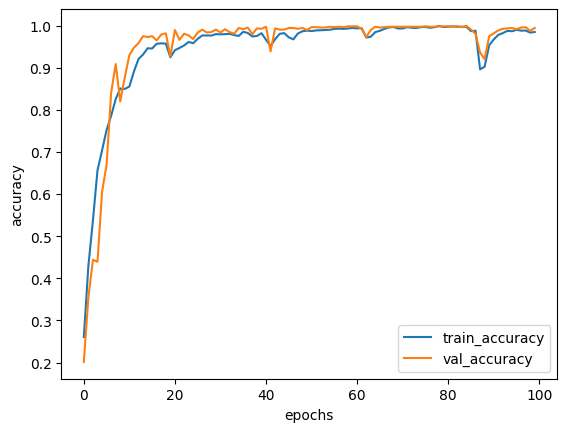

In [62]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train_accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

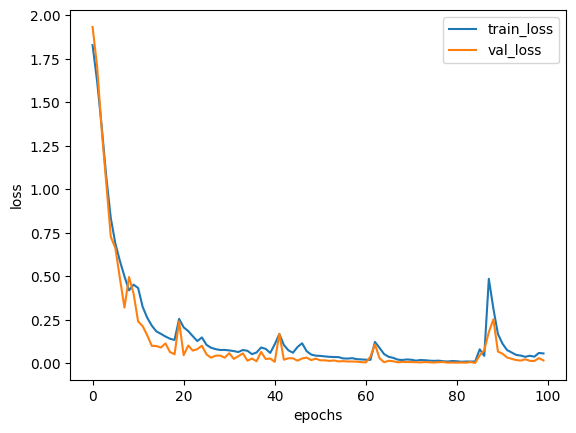

In [63]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train_loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()